In [15]:
log_file_path = "/home/jupyter/bert/ratio_proportion_change3_1920/logs/oct_logs/log_train_finetuned_info.txt"

iterations = []
loss_values = []
accuracy_values = []

with open(log_file_path, 'r') as file:
    for line in file:
        if line.strip().startswith("{"): 
            line_dict = eval(line.strip()) 
          
            iterations.append(line_dict.get('epoch')) 
            loss = line_dict.get('confusion_matrix')  
            accuracy = line_dict.get('predicted_labels')

            loss_values.append(loss)
            accuracy_values.append(accuracy)

iterations[:5], loss_values[:5], accuracy_values[:5]


(['EP20_train', 'EP20_train', 'EP20_train', 'EP20_train', 'EP20_train'],
 ['[[542  53]\n [  0   0]]',
  '[[569  26]\n [  0   0]]',
  '[[234 361]\n [  0   0]]',
  '[[ 76 519]\n [  0   0]]',
  '[[ 78 517]\n [  0   0]]'],
 ['[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

accuracy_values = np.linspace(0, 1, 20)


plt.plot(iterations, accuracy_values, marker='o', label='Accuracy', color='green', linestyle='-', linewidth=2)
plt.xlabel('Training Iterations', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title('Model Performance over Training Iterations', fontsize=16)
plt.xticks(iterations)  
plt.ylim(0, 1)  
plt.grid(True)

plt.twinx()  
plt.plot(iterations, loss_values, marker='x', label='Loss', color='red', linestyle='--', linewidth=2)
plt.ylabel('Loss', fontsize=14)
plt.ylim(0, 1.6)

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd


log_file_path = "/home/jupyter/bert/ratio_proportion_change3_1920/logs/oct_logs/log_train_finetuned_info.txt"

df = pd.read_csv(log_file_path, sep=",", names=["Epoch", "ConfusionMatrix", "TrueLabels", "PredictedLabels", "Probabilities"])

print(df)



In [ ]:
import json

log_file_path = "/home/jupyter/bert/ratio_proportion_change3_1920/logs/oct_logs/log_train_finetuned_info.txt"

iterations = []
confusion_matrices = []
predicted_labels = []

with open(log_file_path, 'r') as file:
    for line in file:
        try:
            line_dict = json.loads(line.strip())  # Use json.loads to parse the JSON string
            iterations.append(line_dict.get('epoch'))
            confusion_matrices.append(line_dict.get('confusion_matrix'))
            predicted_labels.append(line_dict.get('predicted_labels'))
        except json.JSONDecodeError as e:
            print(f"Error decoding JSON on line: {line.strip()} | Error: {str(e)}")

print(iterations[:5], confusion_matrices[:5], predicted_labels[:5])


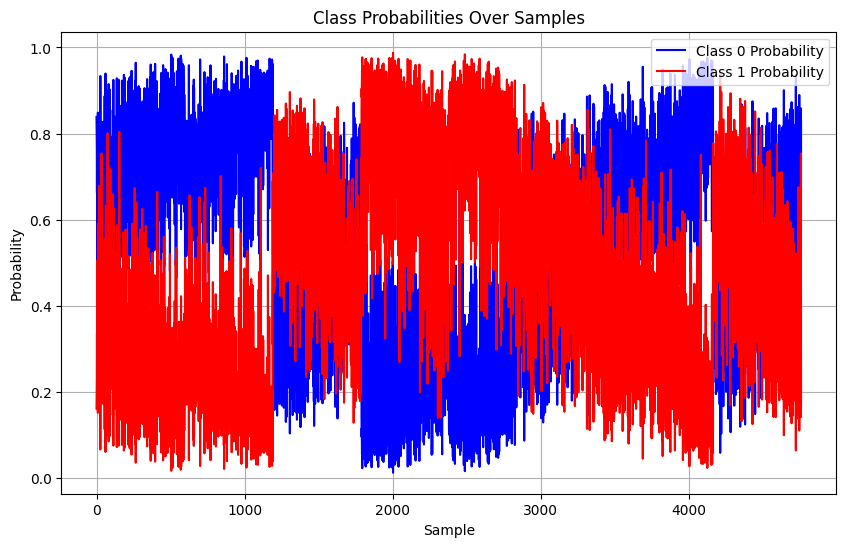

In [36]:
import matplotlib.pyplot as plt
import numpy as np

log_file_path = "/home/jupyter/bert/ratio_proportion_change3_1920/logs/oct_logs/log_train_finetuned_info.txt"

# Lists to hold data
probabilities = []

    for line in file:
        if line.strip().startswith("{"): 
            line_dict = eval(line.strip())
            # Extract the probabilities if they exist in the log
            prob_entry = line_dict.get('probabilities')
            if prob_entry:
                # Probabilities expected to be a list of lists
                probabilities.extend(eval(prob_entry))

# Plotting the probabilities
plt.figure(figsize=(10, 6))
plt.plot(probabilities[:, 0], label='Class 0 Probability', color='blue')
plt.plot(probabilities[:, 1], label='Class 1 Probability', color='red')
plt.xlabel('Sample')
plt.ylabel('Probability')
plt.title('Class Probabilities Over Samples')
plt.legend(loc='best')
plt.grid(True)
plt.show()


In [39]:
import matplotlib.pyplot as plt

log_file_path = "/home/jupyter/bert/ratio_proportion_change3_1920/logs/oct_logs/log_train_finetuned.txt"

epochs = []
loss_values = []
accuracy_values = []

# Reading the log file
with open(log_file_path, 'r') as file:
    for line in file:
        if line.strip().startswith("{"): 
            try:
                log_data = eval(line.strip()) 

                print(f"Parsed Log Data: {log_data}")

                epoch = log_data.get('epoch')
                loss = log_data.get('loss')
                accuracy = log_data.get('accuracy')

                print(f"Epoch: {epoch}, Loss: {loss}, Accuracy: {accuracy}")

                # Append to lists if values are present
                if epoch and loss is not None and accuracy is not None:
                    epochs.append(epoch)
                    loss_values.append(float(loss))
                    accuracy_values.append(float(accuracy))
            except Exception as e:
                print(f"Error processing line: {e}")

# Check if data was extracted
print(f"Epochs: {epochs}")
print(f"Loss Values: {loss_values}")
print(f"Accuracy Values: {accuracy_values}")

# Plotting Loss and Accuracy if data is present
if epochs and loss_values and accuracy_values:
    plt.figure(figsize=(12, 6))

    # Subplot for loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss_values, label='Loss', color='blue', marker='o')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training Loss over Epochs')
    plt.grid(True)

    # Subplot for accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy_values, label='Accuracy', color='green', marker='o')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Training Accuracy over Epochs')
    plt.grid(True)

    plt.tight_layout()
    plt.show()
else:
    print("No data to plot. Please check the log file for correct format.")


Parsed Log Data: {'epoch': 20, 'iter': 0, 'avg_loss': 0.6324796080589294, 'avg_acc': 100.0, 'loss': 0.6324796080589294}
Epoch: 20, Loss: 0.6324796080589294, Accuracy: None
Parsed Log Data: {'epoch': 20, 'iter': 10, 'avg_loss': 0.8984121463515542, 'avg_acc': 45.45454545454545, 'loss': 0.6594327092170715}
Epoch: 20, Loss: 0.6594327092170715, Accuracy: None
Parsed Log Data: {'epoch': 20, 'iter': 20, 'avg_loss': 0.9652528280303592, 'avg_acc': 28.57142857142857, 'loss': 1.4224793910980225}
Epoch: 20, Loss: 1.4224793910980225, Accuracy: None
Parsed Log Data: {'epoch': 20, 'iter': 30, 'avg_loss': 0.9635869822194499, 'avg_acc': 25.806451612903224, 'loss': 0.7135135531425476}
Epoch: 20, Loss: 0.7135135531425476, Accuracy: None
Parsed Log Data: {'epoch': 20, 'iter': 40, 'avg_loss': 0.972876513876566, 'avg_acc': 24.390243902439025, 'loss': 1.3517900705337524}
Epoch: 20, Loss: 1.3517900705337524, Accuracy: None
Parsed Log Data: {'epoch': 20, 'iter': 50, 'avg_loss': 1.021922061256334, 'avg_acc': 25

Parsed Log Data: {'epoch': 20, 'iter': 0, 'avg_loss': 0.6324796080589294, 'avg_acc': 100.0, 'loss': 0.6324796080589294}
Epoch: 20, Loss: 0.6324796080589294, Average Loss: 0.6324796080589294, Average Accuracy: 100.0
Parsed Log Data: {'epoch': 20, 'iter': 10, 'avg_loss': 0.8984121463515542, 'avg_acc': 45.45454545454545, 'loss': 0.6594327092170715}
Epoch: 20, Loss: 0.6594327092170715, Average Loss: 0.8984121463515542, Average Accuracy: 45.45454545454545
Parsed Log Data: {'epoch': 20, 'iter': 20, 'avg_loss': 0.9652528280303592, 'avg_acc': 28.57142857142857, 'loss': 1.4224793910980225}
Epoch: 20, Loss: 1.4224793910980225, Average Loss: 0.9652528280303592, Average Accuracy: 28.57142857142857
Parsed Log Data: {'epoch': 20, 'iter': 30, 'avg_loss': 0.9635869822194499, 'avg_acc': 25.806451612903224, 'loss': 0.7135135531425476}
Epoch: 20, Loss: 0.7135135531425476, Average Loss: 0.9635869822194499, Average Accuracy: 25.806451612903224
Parsed Log Data: {'epoch': 20, 'iter': 40, 'avg_loss': 0.972876

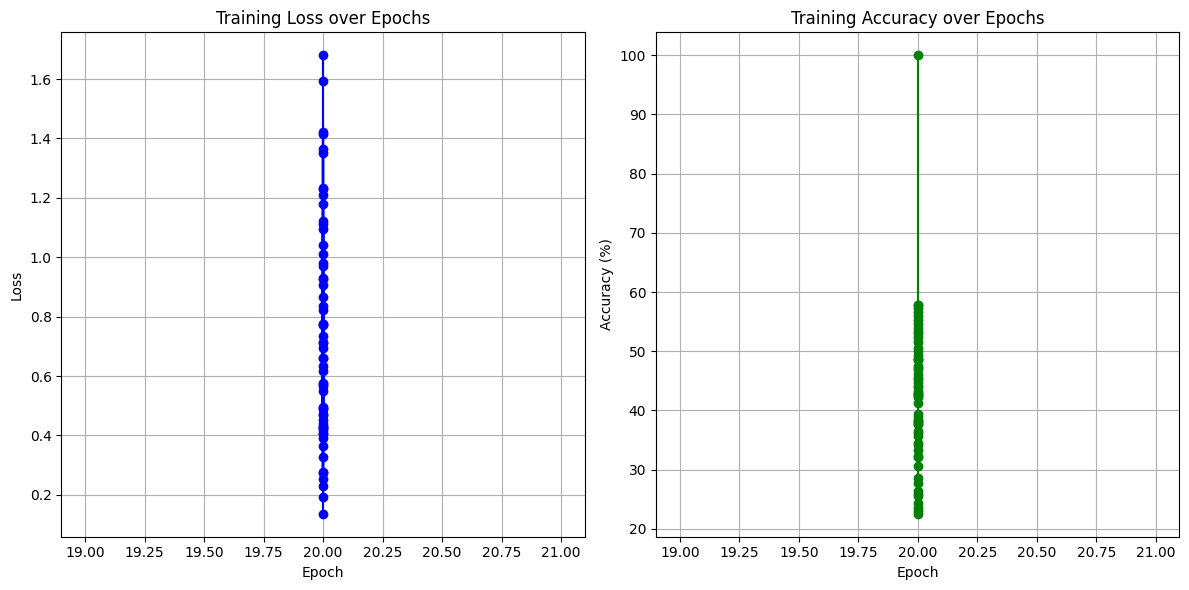

In [41]:
import matplotlib.pyplot as plt

# Path to the log file
log_file_path = "/home/jupyter/bert/ratio_proportion_change3_1920/logs/oct_logs/log_train_finetuned.txt"

# Variables to store extracted data
epochs = []
loss_values = []
accuracy_values = []

# Reading the log file
with open(log_file_path, 'r') as file:
    for line in file:
        if line.strip().startswith("{"):  # Check for the start of a log entry
            try:
                log_data = eval(line.strip())  # Convert the line into a dictionary

                # Debugging: Print the parsed log data
                print(f"Parsed Log Data: {log_data}")

                # Extract necessary fields
                epoch = log_data.get('epoch')
                loss = log_data.get('loss')  # The loss value in the log
                avg_loss = log_data.get('avg_loss')  # The average loss
                avg_acc = log_data.get('avg_acc')  # The average accuracy

                # Debugging: Check if loss and accuracy are being extracted
                print(f"Epoch: {epoch}, Loss: {loss}, Average Loss: {avg_loss}, Average Accuracy: {avg_acc}")

                # Append to lists if values are present
                if epoch and (loss is not None or avg_loss is not None) and (avg_acc is not None):
                    epochs.append(epoch)  # Store the epoch
                    loss_values.append(float(loss) if loss is not None else float(avg_loss))
                    accuracy_values.append(float(avg_acc))

            except Exception as e:
                print(f"Error processing line: {e}")

# Check if data was extracted
print(f"Epochs: {epochs}")
print(f"Loss Values: {loss_values}")
print(f"Accuracy Values: {accuracy_values}")

# Plotting Loss and Accuracy if data is present
if epochs and loss_values and accuracy_values:
    plt.figure(figsize=(12, 6))

    # Subplot for loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss_values, label='Loss', color='blue', marker='o')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training Loss over Epochs')
    plt.grid(True)

    # Subplot for accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy_values, label='Accuracy', color='green', marker='o')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy (%)')
    plt.title('Training Accuracy over Epochs')
    plt.grid(True)

    plt.tight_layout()
    plt.show()
else:
    print("No data to plot. Please check the log file for correct format.")
